# Project: Helicopter Prison Escapes

The dataset used is available on Wikipedia, [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts).
In this project, we'll answer the following questions:

- In which year did the most attempts at breaking out of prison with a helicopter occur?
- In which countries do the most attempted helicopter prison escapes occur?


In [80]:
#import modules
import pandas as pd
import re
import matplotlib.pyplot as plt

In [100]:
#Functions
def plot_bar(x,y,label):
    plt.figure(figsize=(10,6))
    plt.bar(x,y,tick_label=x)
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel(label)
    plt.ylabel("No of Attempts")
    plt.show()
    
def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])

In [101]:
#import data from wikipedia
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = pd.read_html(url)[1]

In [102]:
#print first 5 rows
data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


The last column in each row is a description of the event. This information is not required to solve this problem. Let's remove the last column.

In [103]:
#remove description column
data = data.drop('Details',1) 

In [104]:
data.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


The dates column seems to follow the format **'Month Date, Year'**. Let's modify the column to only include only the year. 

In [105]:
#modify date column
data['Date'] = data['Date'].apply(fetch_year)

In [106]:
data.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,1971,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,1973,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,1978,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,1981,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,1981,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


## Attempts by Year

Let's find out the number of prison escapes in each year.

In [107]:
Attempts_by_year = data.groupby('Date').size().reset_index(name='Count')

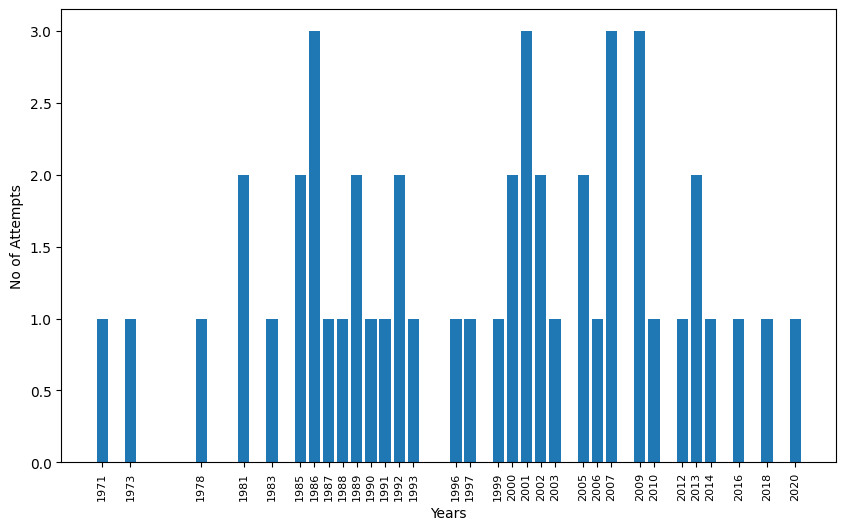

In [108]:
plot_bar(Attempts_by_year['Date'], Attempts_by_year['Count'],"Years")

3 prison escapes were recorded in the years - 1986, 2001, 2007 and 2009 each. This is the highest value based on the data. 

## Attempts by Countries

Let's answer our second problem - Number of prison escape attempts based on countries.

In [109]:
Attempts_by_countries = data.groupby("Country").size().reset_index(name='Count')

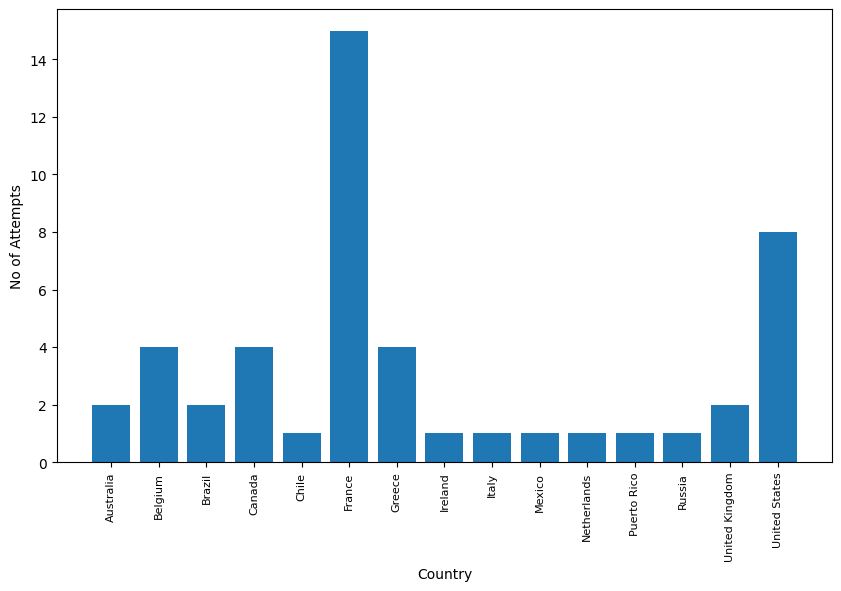

In [110]:
plot_bar(Attempts_by_countries['Country'], Attempts_by_countries['Count'], "Country")

France has the highest number recorded - 15 prison escapes. United States fall second - 8 prison escapes. 